<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Classificazione_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 


# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


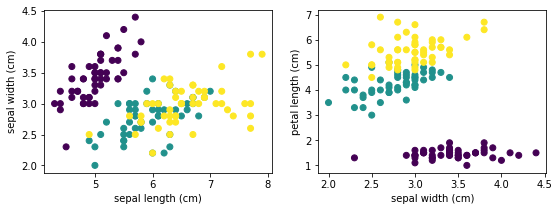

In [3]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,50 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# DATA PREPARATION

In [4]:
#splitting the data into training and test sets 
from sklearn.model_selection import train_test_split

#Optional parameter ‘test-size’ determines the split percentage. 
#‘random_state’ parameter makes the data split the same way every time you run.
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.3
                                                 ,random_state=4)

#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

# shape of new y objects
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


# NN DATA PREPROCESSING

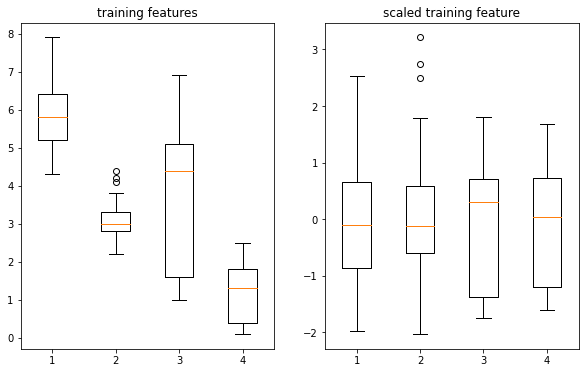

In [5]:


# Multi-layer Perceptron is sensitive to feature scaling, so it is highly
# recommended to scale your data. 

# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_ss = scaler.transform(X_train)  
X_test_ss = scaler.transform(X_test) 
X_ALL_ss = scaler.transform(data) 

input_data=(X_train,X_train_ss)
label=('training features', 'scaled training feature')
fig,axs=plt.subplots(1,2,figsize=(10,6))

for i,X_IN in enumerate(input_data):
  axs[i].boxplot(X_IN)
  axs[i].set_title(label[i])

plt.show()



# NEURAL NETWORK CLASSIFICATION


Solver:  adam
i=  0
Hidden Neurons:  1
Hidden Neurons:  2
Hidden Neurons:  3
Hidden Neurons:  4
Hidden Neurons:  5
Hidden Neurons:  6
Hidden Neurons:  7
Hidden Neurons:  8
Hidden Neurons:  9

 adam : Accuracy is [0.47000000000000003, 0.305, 0.915, 0.47000000000000003, 0.9199999999999999, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001]

 adam : Max Accuracy is 0.9400000000000001

 adam : Lowest number of neurons in hidden layers, with the maximum accuracy is 6

Solver:  lbfgs
i=  1
Hidden Neurons:  1
Hidden Neurons:  2
Hidden Neurons:  3
Hidden Neurons:  4
Hidden Neurons:  5
Hidden Neurons:  6
Hidden Neurons:  7
Hidden Neurons:  8
Hidden Neurons:  9

 lbfgs : Accuracy is [0.47000000000000003, 0.47000000000000003, 0.8949999999999999, 0.47000000000000003, 0.9199999999999999, 0.8949999999999999, 0.47000000000000003, 0.8949999999999999, 0.8699999999999999]

 lbfgs : Max Accuracy is 0.9199999999999999

 lbfgs : Lowest number of neurons in hidden layers, with 

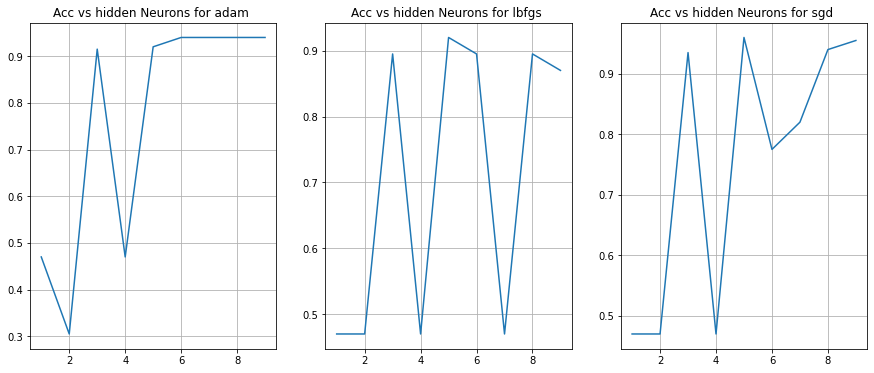

In [7]:
#The advantages of Multi-layer Perceptron are:
# - Capability to learn non-linear models.
# - Capability to learn models in real-time (on-line learning) using partial_fit.
#The disadvantages of Multi-layer Perceptron (MLP) include:
# - MLP with hidden layers have a non-convex loss function where there exists 
#   more than one local minimum. Therefore different random weight initializations 
#   can lead to different validation accuracy.
# - MLP requires tuning a number of hyperparameters such as the number of 
#   hidden neurons, layers, and iterations.
# - MLP is sensitive to feature scaling.

#to optimize: # of neurons, #of hidden layers, epoch, learning rate

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

#number of cross validation
cv=10

#maximum number of neurons to be evaluated
max_number_of_neurons=10

#list of solvers
solver_l=('adam','lbfgs','sgd')
accuracy_matrix = []

fig,axs=plt.subplots(1,len(solver_l),figsize=(5*len(solver_l),6))

#loop to choose the solver
for i,solver in enumerate(solver_l):
  print('\nSolver: ',solver)
  #print('i= ',i)
  accuracy=[]

  #loop to choose the number of hidden neurons
  for hidden_layers_neurons in range(1,max_number_of_neurons):
    #print('Hidden Neurons: ',hidden_layers_neurons)
    
    #create the MLP
    mlp = MLPClassifier(solver=solver, alpha=1e-5,
                      hidden_layer_sizes=(hidden_layers_neurons,
                                          hidden_layers_neurons,), 
                      random_state=1,max_iter=100000)
    
    #Store the scoring (mean of accuracy of cv corss validation) got by 
    #'cross_val_score'
    accuracy.append(cross_val_score(mlp,X_test,y_test,
                                       scoring='accuracy',cv=cv).mean())
  ###########################################

  #store the scoring given one solver of soler_l list 
  accuracy_matrix.append(accuracy)

  print(solver,': Accuracy is', accuracy_matrix[i])
  print(solver,': Max Accuracy is', max(accuracy_matrix[i]))
  print(solver,
        ': Lowest number of neurons in hidden layers,with the maximum accuracy is',
        (accuracy_matrix[i].index(max(accuracy_matrix[i]))+1))
  
  asse_X=np.arange(1,10)
  axs[i].plot(asse_X,accuracy_matrix[i])
  axs[i].set_title('Acc vs hidden Neurons for %s ' % solver_l[i])
  axs[i].grid(True)

  
